This notebook is for when you have used envs_plotter to plot individual simulation statistics for various loads, and now wish to do some plots across multiple simulation statistics for cross-simulation analysis. Note that this notebook requires you having set a path_to_save string when calling envs_plotter so that an envs_plotter_<sim_name> directory contains a summary_dataframe.pkl file.

In [54]:
%load_ext autoreload
import trafpy
import trafpy.generator as tpg

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
%autoreload

# str paths to summary dataframe pickles. Use {param: path}
base_path = '/rdata/ong/trafpy/management/flowcentric/'
summary_dataframe_paths = {}
# control_var_name='% Intra-Rack'
# params = [0.2, 0.4, 0.6, 0.8] # rack_dist_sensitivity
control_var_name='% Hot Nodes'
params = [0.05, 0.1, 0.2, 0.4] # skewed_nodes_sensitivity
for i in params:
    folder = 'skewed_nodes_sensitivity_{}_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data'.format(i)
    path = base_path+folder+'/envs_plotter_'+folder+'/summary_dataframe.pkl'
    summary_dataframe_paths[i] = path
print(summary_dataframe_paths)

{0.05: '/rdata/ong/trafpy/management/flowcentric/skewed_nodes_sensitivity_0.05_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/envs_plotter_skewed_nodes_sensitivity_0.05_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/summary_dataframe.pkl', 0.1: '/rdata/ong/trafpy/management/flowcentric/skewed_nodes_sensitivity_0.1_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/envs_plotter_skewed_nodes_sensitivity_0.1_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/summary_dataframe.pkl', 0.2: '/rdata/ong/trafpy/management/flowcentric/skewed_nodes_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/envs_plotter_skewed_nodes_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/summary_dataframe.pkl', 0.4: '/rdata/ong/trafpy/management/f

In [62]:
%autoreload
import pandas as pd

# load dataframes and convert to dicts
summary_dicts = {}
for i in summary_dataframe_paths.keys():
    summary_dicts[i] = pd.read_pickle(summary_dataframe_paths[i]).to_dict()
print(summary_dicts.keys())
print(summary_dicts[list(summary_dicts.keys())[0]].keys())

dict_keys([0.05, 0.1, 0.2, 0.4])
dict_keys(['Load', 'Subject', 'T-Score', 'Mean FCT (μs)', 'p99 FCT (μs)', 'Max FCT (μs)', 'Throughput Frac', 'Frac Flows Dropped', 'Frac Info Dropped'])


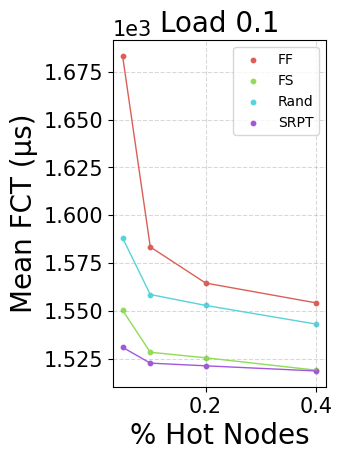

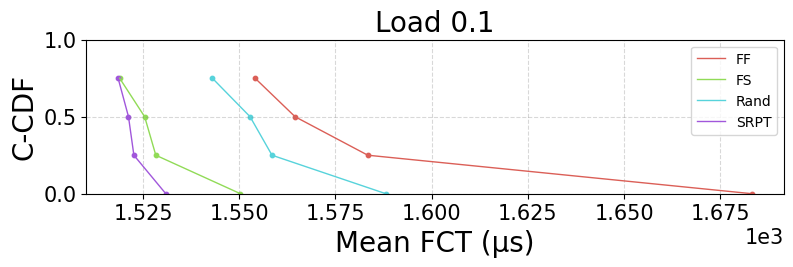

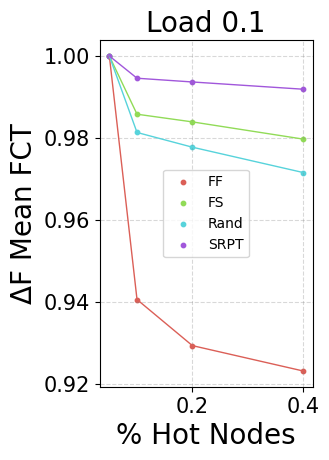

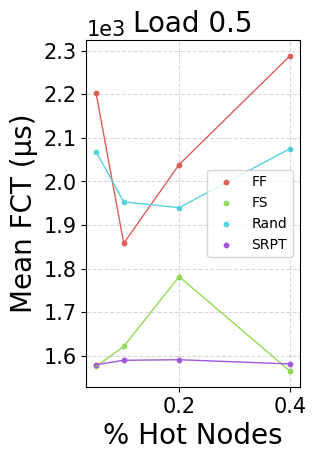

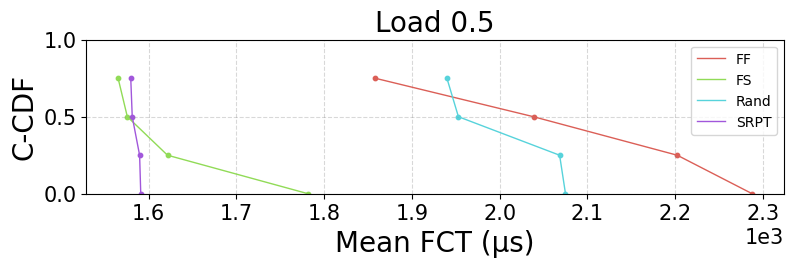

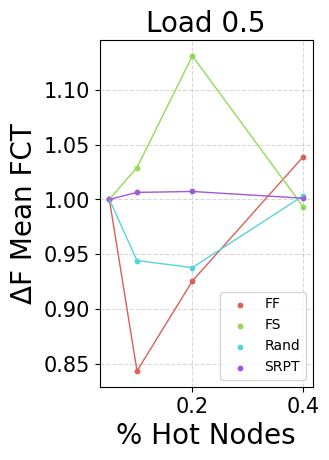

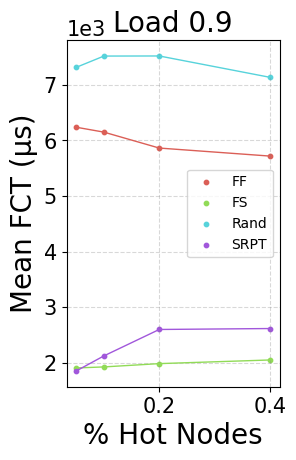

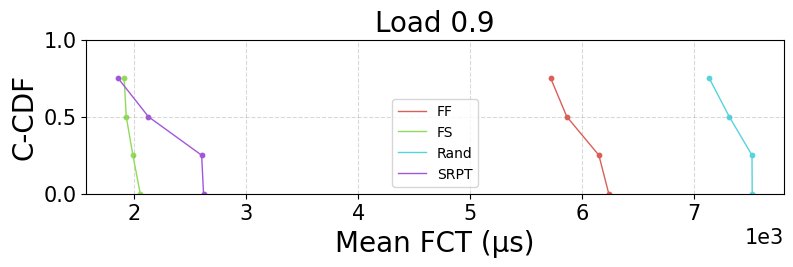

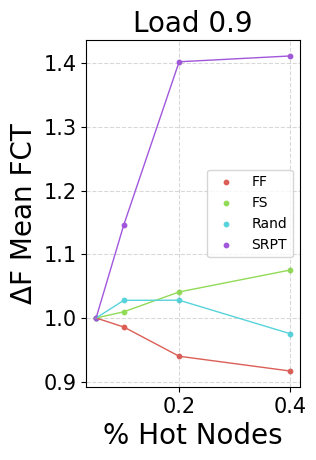

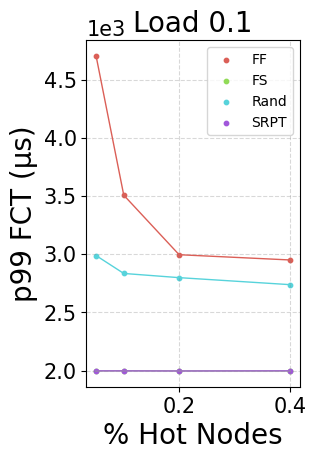

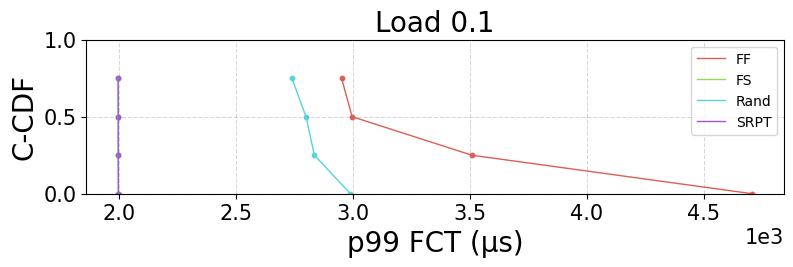

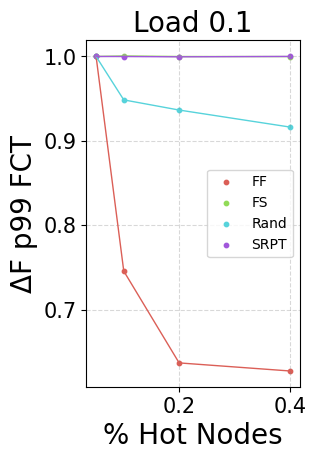

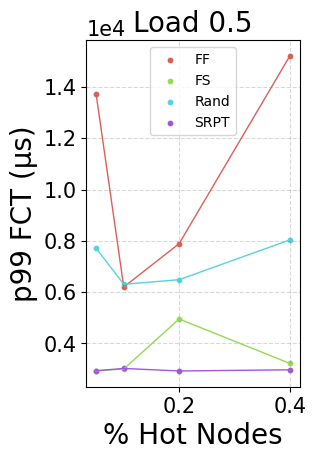

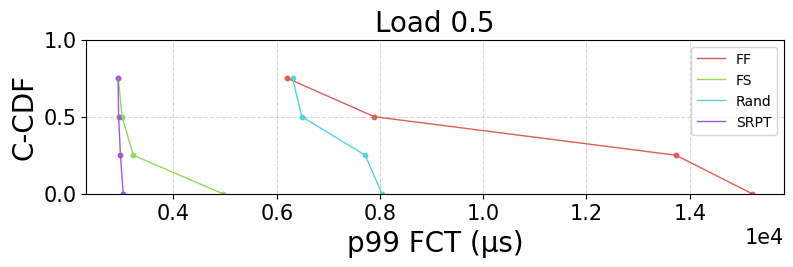

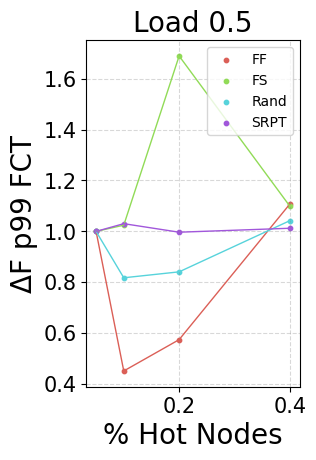

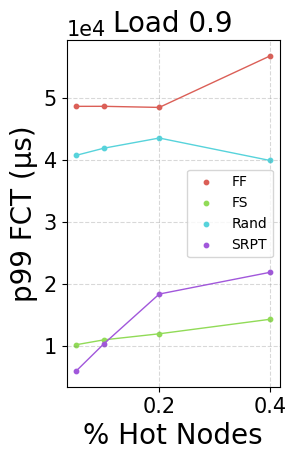

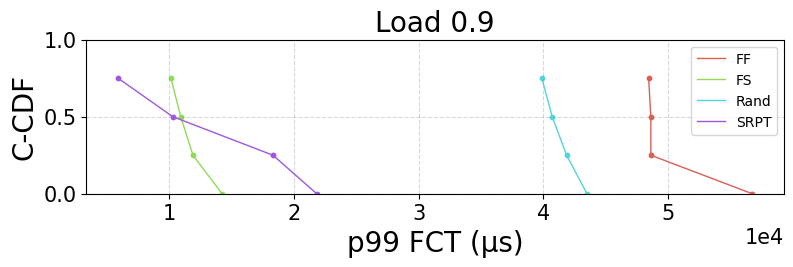

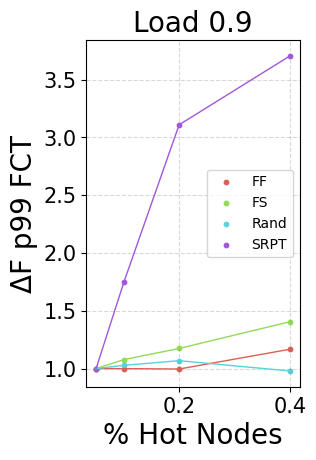

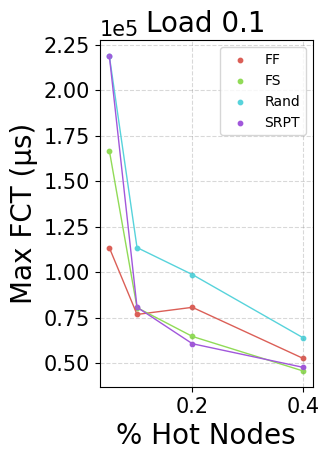

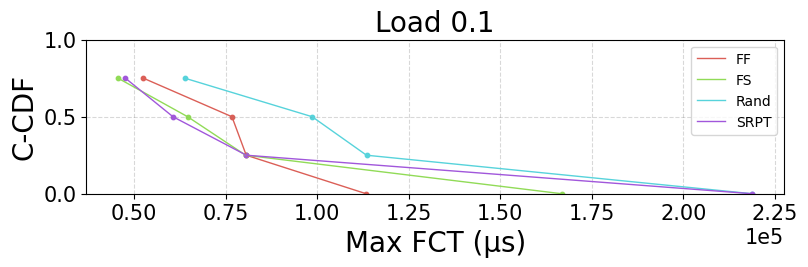

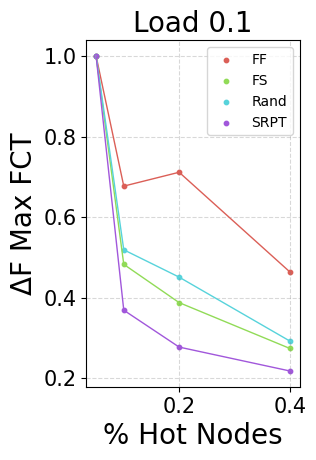

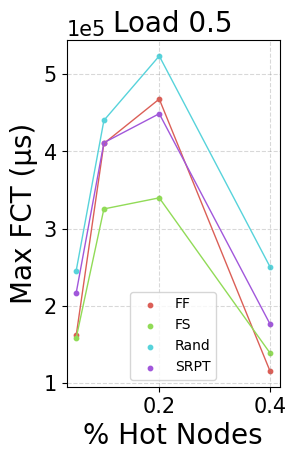

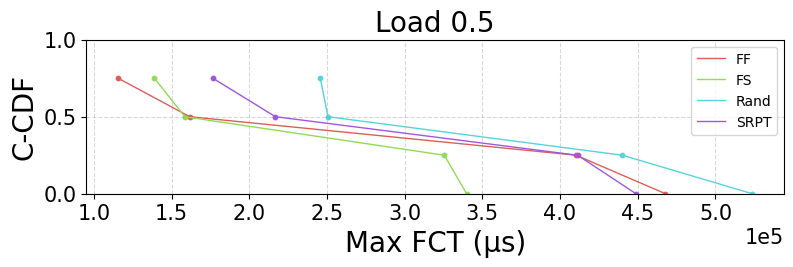

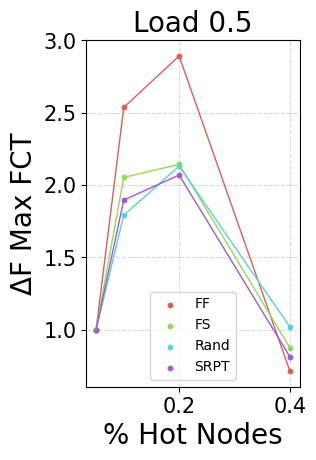

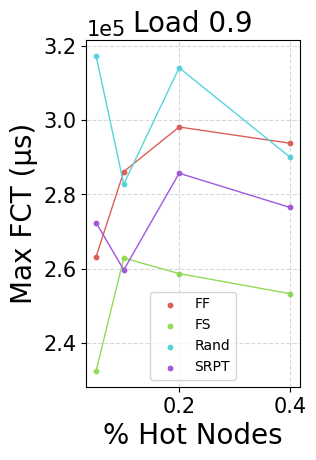

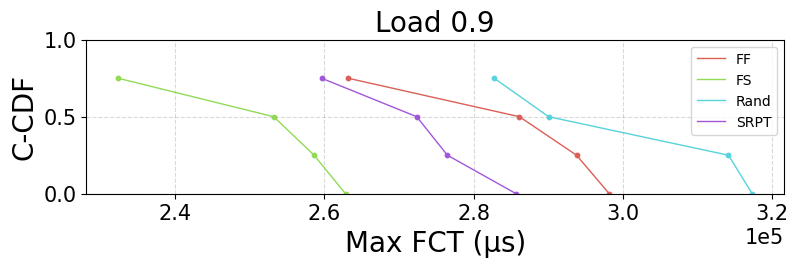

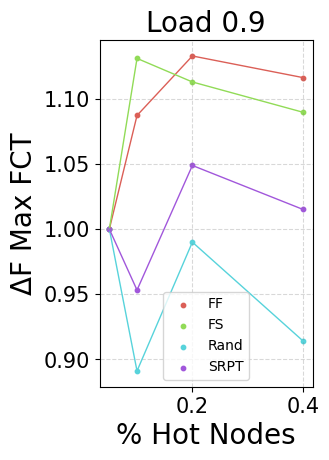

In [65]:
%autoreload
import numpy as np
from trafpy.manager import plot_summary_dict_params




# FLOW COMPLETION METRICS

# subjects_to_plot=['SRPT', 'FS']
subjects_to_plot='all'
loads=[0.1, 0.5, 0.9]
font_size=20
# cdf_figsize=(6,2)
cdf_figsize=(9,2)
scatter_figsize=(2.75,4.5)





figs = plot_summary_dict_params(summary_dicts, 
                              dependent_var_name='Mean FCT', # don't include units, will include automatically except in delta F plot
                              control_var_name=control_var_name,
                              subjects_to_plot=subjects_to_plot,
                              loads=loads,
                              font_size=font_size,
                              logscale=False,
                              gridlines=True,
                                use_scientific_notation=True,
                              cdf_figsize=cdf_figsize, 
#                               scatter_figsize=(4,3),
                              scatter_figsize=scatter_figsize,
                              path_to_save=None)


figs = plot_summary_dict_params(summary_dicts, 
                              dependent_var_name='p99 FCT', # don't include units, will include automatically except in delta F plot
                                control_var_name=control_var_name,
                              subjects_to_plot=subjects_to_plot,
                              loads=loads,
                              font_size=font_size,
                              logscale=False,
                              gridlines=True,
                                use_scientific_notation=True,
                              cdf_figsize=cdf_figsize, 
#                               scatter_figsize=(4,3),
                              scatter_figsize=scatter_figsize,
                              path_to_save=None)


figs = plot_summary_dict_params(summary_dicts, 
                              dependent_var_name='Max FCT', # don't include units, will include automatically except in delta F plot
                              control_var_name=control_var_name,
                              subjects_to_plot=subjects_to_plot,
                              loads=loads,
                              font_size=font_size,
                              logscale=False,
                              gridlines=True,
                              use_scientific_notation=True,
                              cdf_figsize=cdf_figsize, 
#                               scatter_figsize=(4,3),
                              scatter_figsize=scatter_figsize,
                              path_to_save=None)

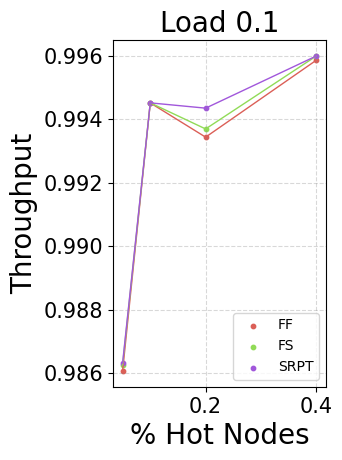

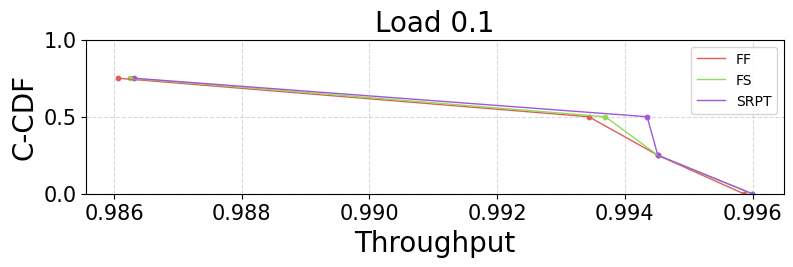

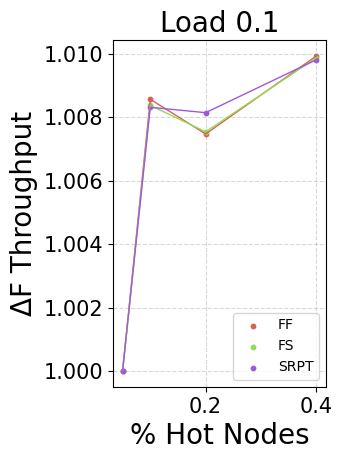

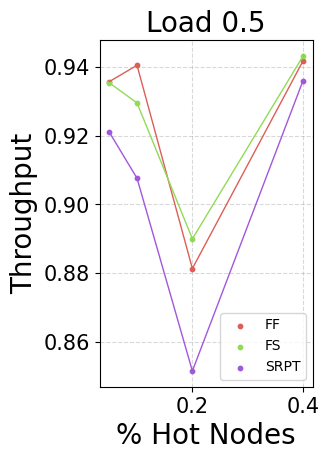

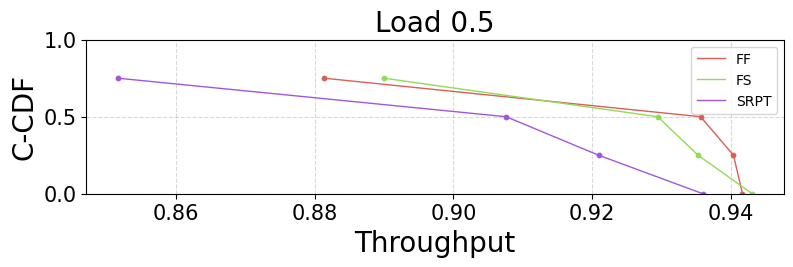

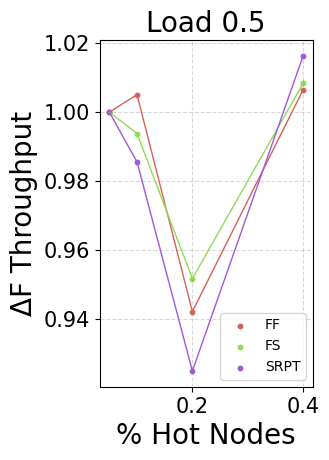

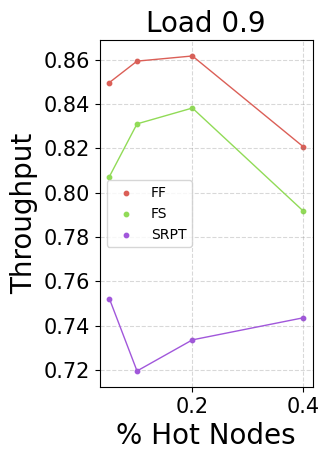

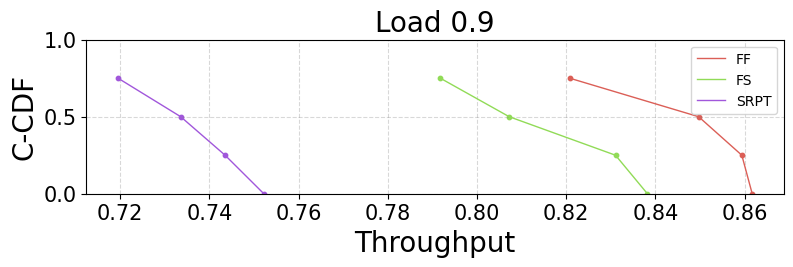

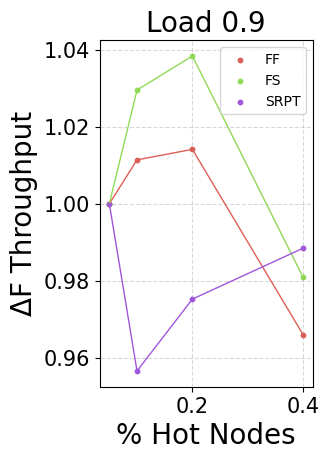

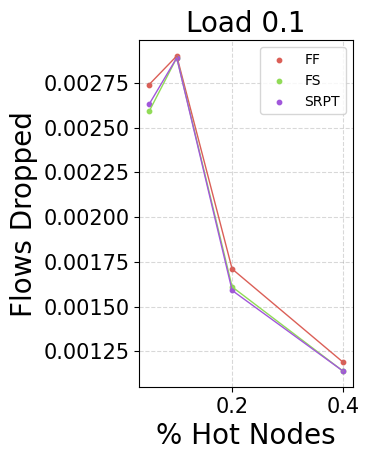

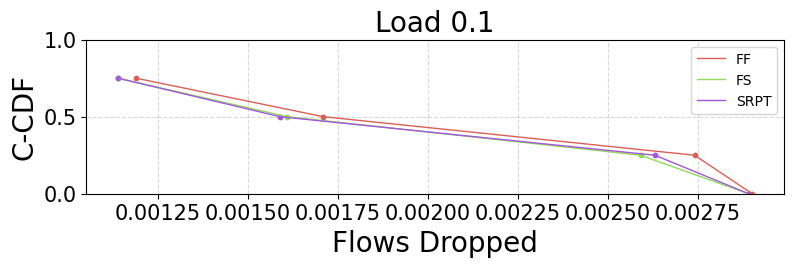

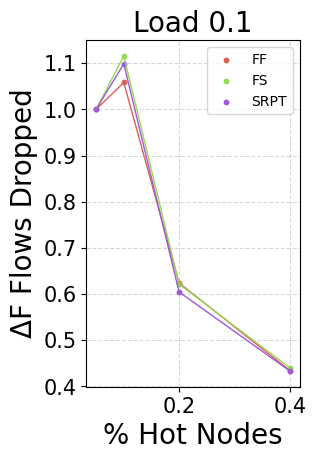

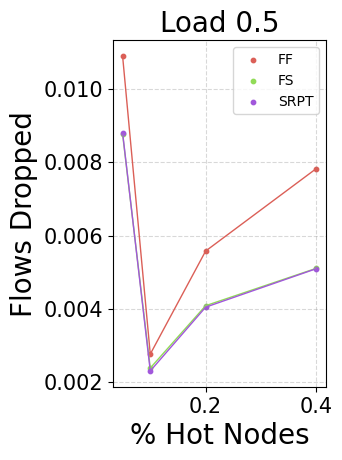

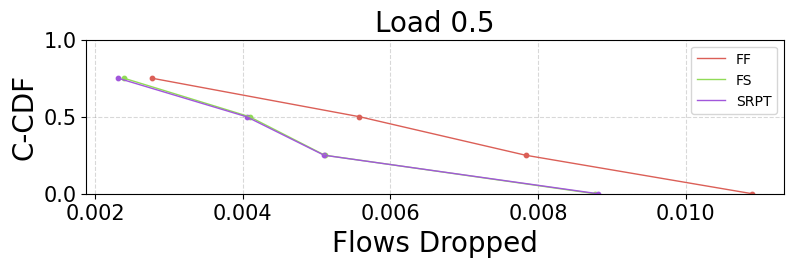

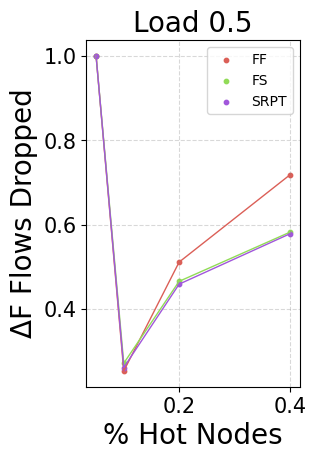

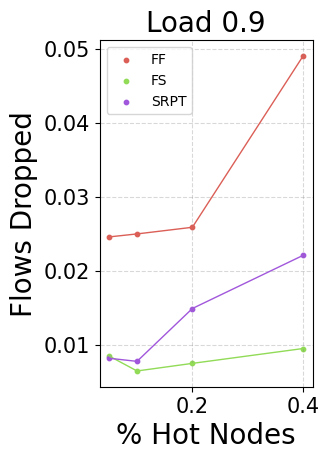

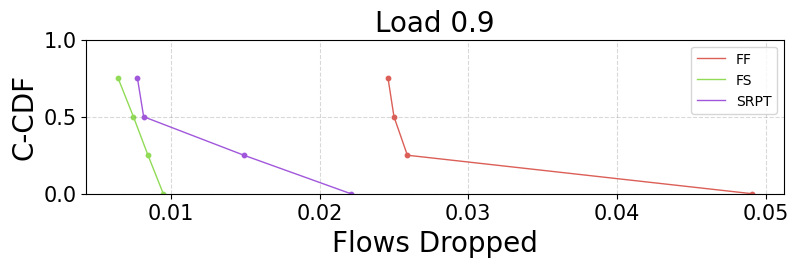

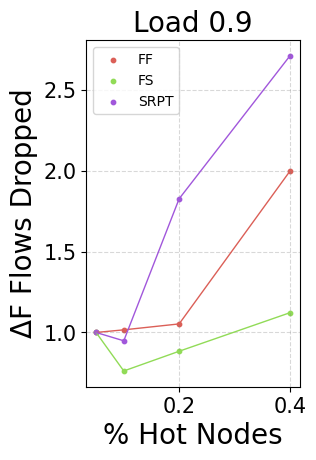

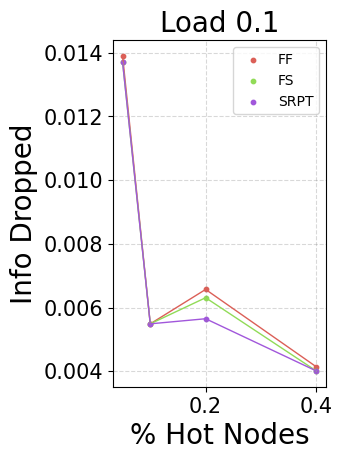

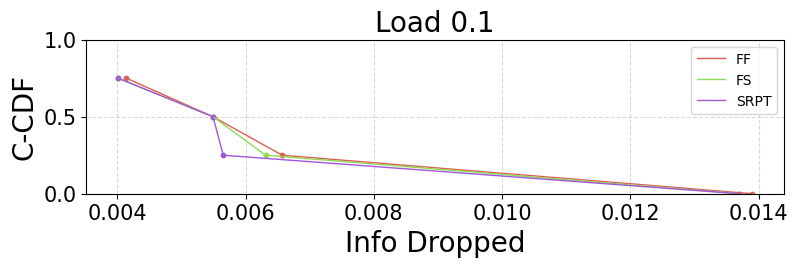

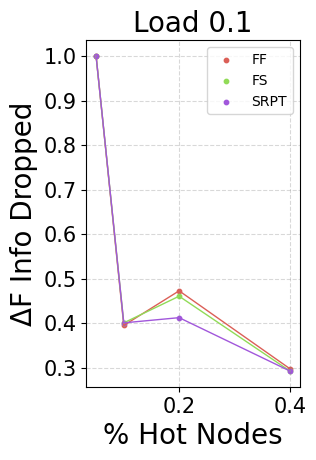

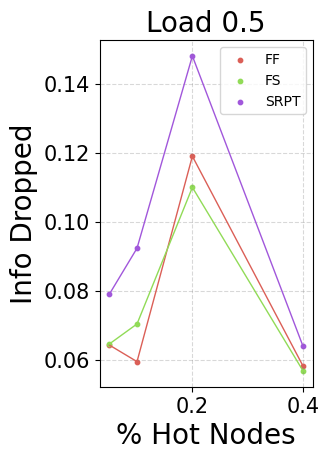

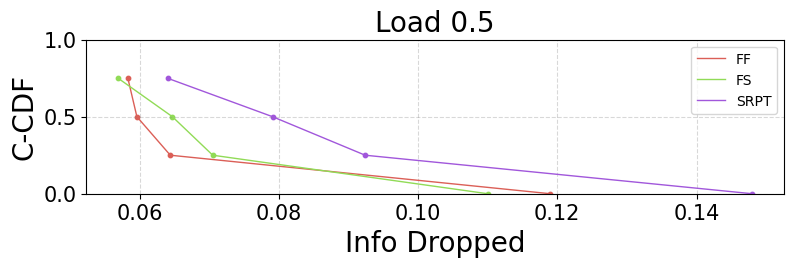

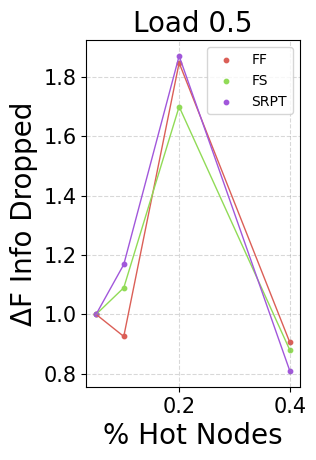

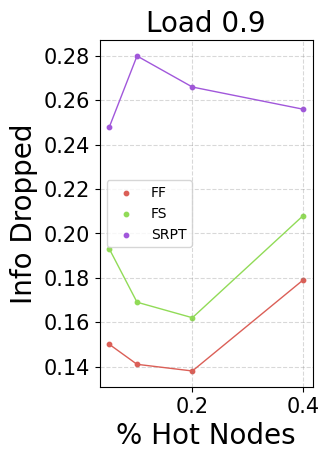

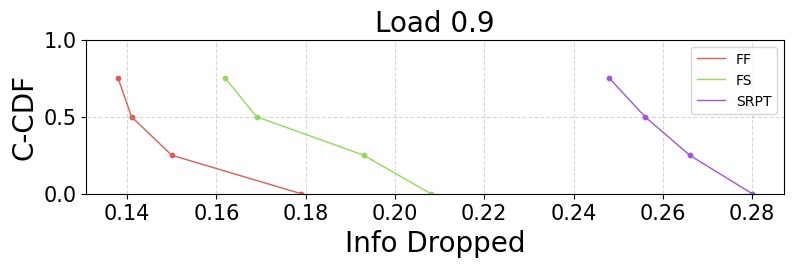

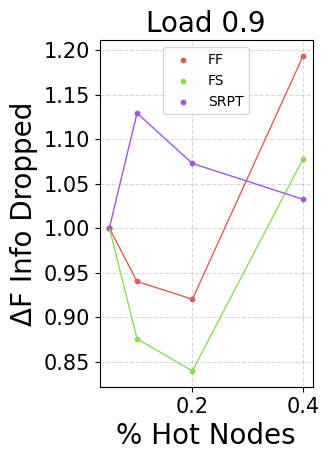

In [66]:
%autoreload
import numpy as np
from trafpy.manager import plot_summary_dict_params




# THROUGHPUT & DEMANDS DROPPED METRICS

subjects_to_plot=['SRPT', 'FS', 'FF']
# subjects_to_plot='all'
loads=[0.1, 0.5, 0.9]
font_size=20
# cdf_figsize=(6,2)
cdf_figsize=(9,2)
scatter_figsize=(2.75,4.5)





figs = plot_summary_dict_params(summary_dicts, 
                              dependent_var_name='Throughput', # don't include units, will include automatically except in delta F plot
                              replace_summary_dict_dependent_var_name=True,
                                control_var_name=control_var_name,
                              subjects_to_plot=subjects_to_plot,
                              loads=loads,
                              font_size=font_size,
                              logscale=False,
                              gridlines=True,
                                use_scientific_notation=False,
                              cdf_figsize=cdf_figsize, 
#                               scatter_figsize=(4,3),
                              scatter_figsize=scatter_figsize,
                              path_to_save=None)


figs = plot_summary_dict_params(summary_dicts, 
                              dependent_var_name='Flows Dropped', # don't include units, will include automatically except in delta F plot
                              replace_summary_dict_dependent_var_name=True,
                                control_var_name=control_var_name,
                              subjects_to_plot=subjects_to_plot,
                              loads=loads,
                              font_size=font_size,
                              logscale=False,
                              gridlines=True,
                                use_scientific_notation=False,
                              cdf_figsize=cdf_figsize, 
#                               scatter_figsize=(4,3),
                              scatter_figsize=scatter_figsize,
                              path_to_save=None)


figs = plot_summary_dict_params(summary_dicts, 
                              dependent_var_name='Info Dropped', # don't include units, will include automatically except in delta F plot
                              replace_summary_dict_dependent_var_name=True,
                                control_var_name=control_var_name,
                              subjects_to_plot=subjects_to_plot,
                              loads=loads,
                              font_size=font_size,
                              logscale=False,
                              gridlines=True,
                              use_scientific_notation=False,
                              cdf_figsize=cdf_figsize, 
#                               scatter_figsize=(4,3),
                              scatter_figsize=scatter_figsize,
                              path_to_save=None)